In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime

#open csv
top_10_data = pd.read_csv("netflix_data.csv")

#display
top_10_data.head(5)

,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,September 25,2021.0,...,0,0,0,0,0,0,0,0,0,1
1,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September 24,2021.0,...,1,0,0,0,0,0,0,0,0,3
2,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
3,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
4,TV Show,Dear White People,United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",September 22,2021.0,...,1,1,0,0,0,0,0,0,0,2


In [2]:
#Movies DF
movies_df = top_10_data[top_10_data['type'] == 'Movie']

# Display the data table for preview
print("Movies:")
movies_df.head()

Movies:


,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,September 25,2021.0,...,0,0,0,0,0,0,0,0,0,1
3,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
6,Movie,Jeans,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",September 21,2021.0,...,0,0,0,0,0,0,0,0,0,3
7,Movie,Grown Ups,United States,"September 20, 2021",2010,PG-13,103 min,Comedies,September 20,2021.0,...,0,0,0,0,0,0,0,0,0,1
8,Movie,Dark Skies,United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",September 19,2021.0,...,0,0,0,0,0,0,0,0,0,2


In [3]:
top_10_data.columns

Index(['type', 'title', 'country', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'month/day_added', 'year_added',
       'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers',


In [4]:
#TV Show DF
tv_shows_df = top_10_data[top_10_data['type'] == 'TV Show']

# Display the data table for preview
print("TV Shows:")
tv_shows_df.head()

TV Shows:


,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
1,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September 24,2021.0,...,1,0,0,0,0,0,0,0,0,3
2,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
4,TV Show,Dear White People,United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",September 22,2021.0,...,1,1,0,0,0,0,0,0,0,2
5,TV Show,Falsa identidad,Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",September 22,2021.0,...,0,1,0,0,0,0,0,0,0,3
9,TV Show,Sex Education,United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",September 17,2021.0,...,1,0,0,0,0,0,0,0,0,3


In [5]:
#Separating Movies Genres into own dataframe
Movies_list_df = movies_df['listed_in'].str.get_dummies(', ')

Movies_list_df.head()

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [6]:
#Separating TV Shows Genres into own dataframe
tv_list_df = tv_shows_df['listed_in'].str.get_dummies(', ')

tv_list_df.head()

,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# Top 10 countries producing movies data:
countries_producing_movies = top_10_data[top_10_data['type'] == 'Movie']['country'].dropna()
country_counts = countries_producing_movies.value_counts()
sorted_country_counts = country_counts.sort_values(ascending=False)
print("Top 10 countries producing movies:")
print(sorted_country_counts.head(10))

Top 10 countries producing movies:
country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Japan               76
France              75
Mexico              70
South Korea         41
Name: count, dtype: int64


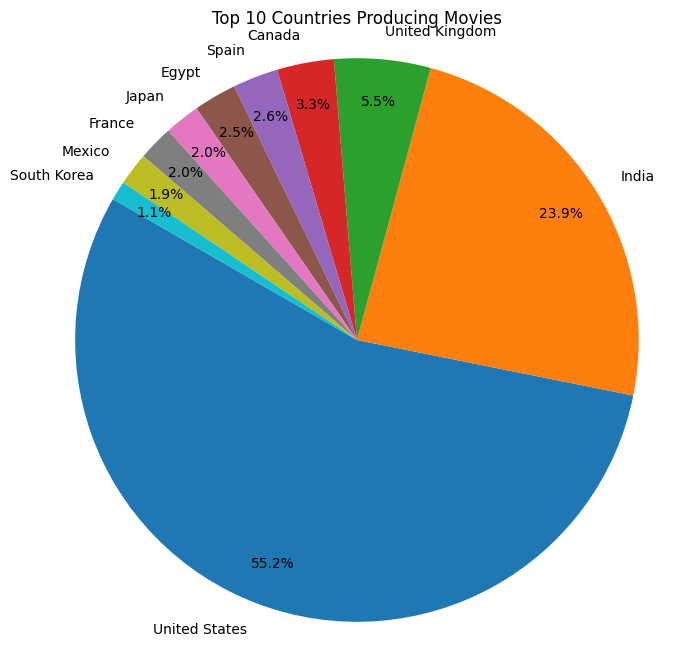

In [8]:
# Pie chart for movies:
countries_producing_shows = top_10_data[top_10_data['type'] == 'Movie']['country'].dropna()
country_counts = countries_producing_shows.value_counts()
top_countries = country_counts.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=150, pctdistance=0.85)
plt.axis('equal')
plt.title('Top 10 Countries Producing Movies')
plt.show()

In [9]:
# Top countries producing TV Shows
countries_producing_shows = top_10_data[top_10_data['type'] == 'TV Show']['country'].dropna()
country_counts = countries_producing_shows.value_counts()
sorted_country_counts = country_counts.sort_values(ascending=False)
print("Top countries producing TV shows:")
print(sorted_country_counts.head(10))

Top countries producing TV shows:
country
United States     760
United Kingdom    213
Japan             168
South Korea       158
India              79
Canada             59
France             49
Spain              48
Mexico             40
Egypt              14
Name: count, dtype: int64


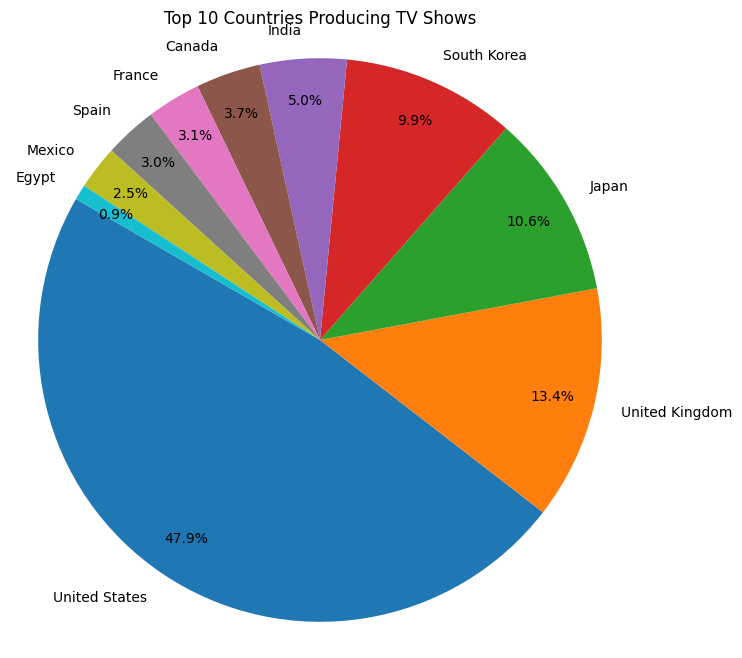

In [10]:
# Pie chart for tv:
countries_producing_shows = top_10_data[top_10_data['type'] == 'TV Show']['country'].dropna()
country_counts = countries_producing_shows.value_counts()
top_countries = country_counts.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=150, pctdistance=0.85)
plt.axis('equal')
plt.title('Top 10 Countries Producing TV Shows')
plt.show()

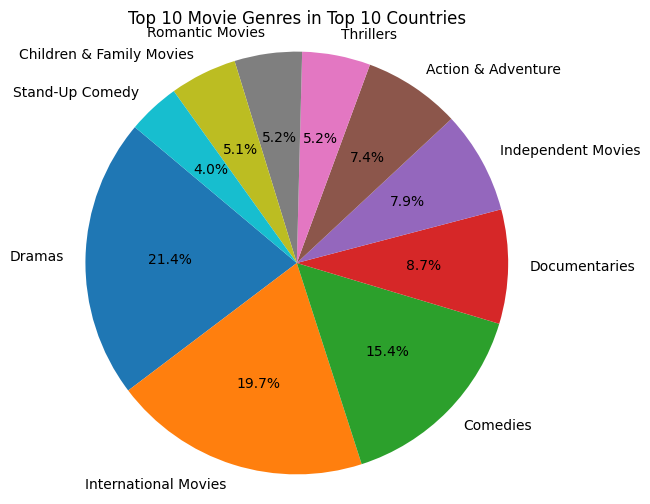

In [11]:
#Pie Chart: Movies: Popular Genre
# Extracting top 10 movie genres
Top_10_Movie_Genre = Movies_list_df.sum().sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(6, 6))

# Plotting the pie chart
Top_10_Movie_Genre.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Top 10 Movie Genres in Top 10 Countries')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

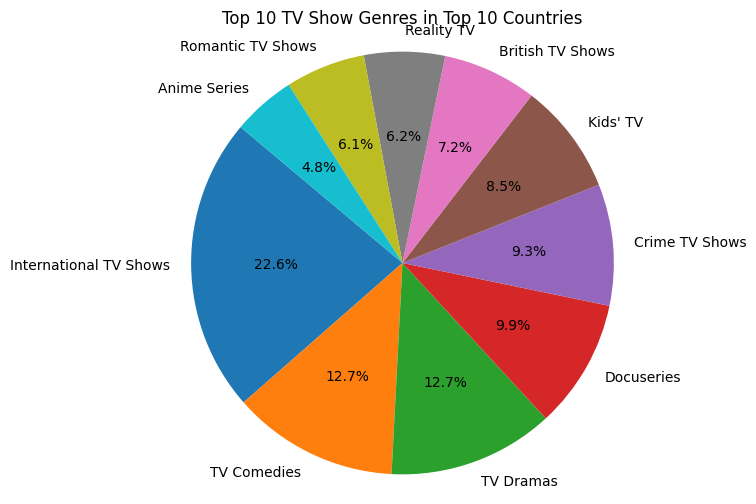

In [12]:
#Pie Chart: TV Shows: Popular Genre
# Extracting top 10 TV Shows genres
Top_10_TV_Genre = tv_list_df.sum().sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(6, 6))

# Plotting the pie chart
Top_10_TV_Genre.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Top 10 TV Show Genres in Top 10 Countries')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

<Figure size 2400x1600 with 0 Axes>

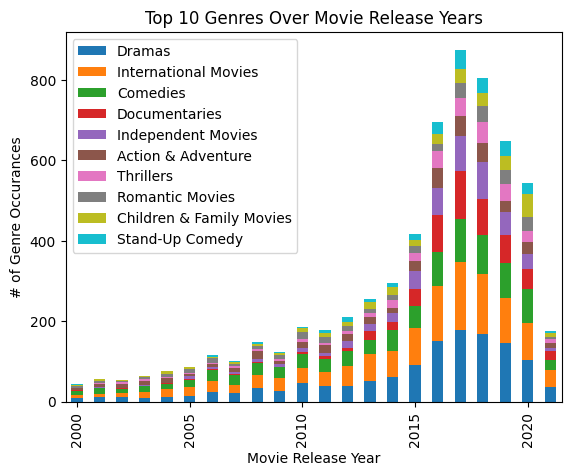

In [13]:
# Define the top 10 categories
top_10_moviegenres = list(Movies_list_df.sum().sort_values(ascending=False).head(10).index)

# Group by 'release_year' and sum the data
grouped_top10genre_movie_data = movies_df[['release_year'] + top_10_moviegenres].groupby('release_year').sum()

grouped_top10genre_movie_data_filtered = grouped_top10genre_movie_data[grouped_top10genre_movie_data.index >= 2000]


# Create a larger figure before plotting
plt.figure(figsize=(24, 16))  # Set the width to 12 inches and height to 8 inches

ax = grouped_top10genre_movie_data_filtered.plot(kind='bar', stacked=True)

# Get the current x-axis labels and positions
x_labels = ax.get_xticklabels()
x_positions = ax.get_xticks()

# Set the x-axis ticks to show every ten years
new_x_positions = x_positions[::5]
new_x_labels = [label.get_text() for label in x_labels][::5]

# Set the new x-axis ticks and labels
ax.set_xticks(new_x_positions)
ax.set_xticklabels(new_x_labels)

# Add title and axis labels
plt.title('Top 10 Genres Over Movie Release Years')  # Add a title
plt.xlabel('Movie Release Year')  # Label for the x-axis
plt.ylabel('# of Genre Occurances')  # Label for the y-axis

# Display the plot
plt.show()

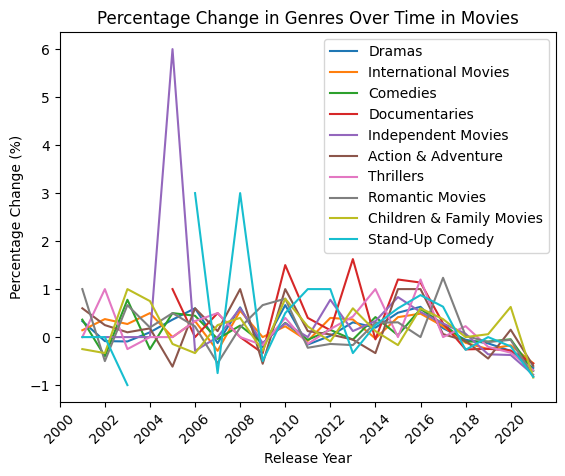

In [14]:
#How did genres change over time in Movies?
y_label_movie_ls = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
grouped_top10genre_movie_data_filtered.pct_change().plot()
plt.title('Percentage Change in Genres Over Time in Movies')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Release Year')
plt.xticks(y_label_movie_ls, rotation=45)
plt.show()

<Figure size 2400x1600 with 0 Axes>

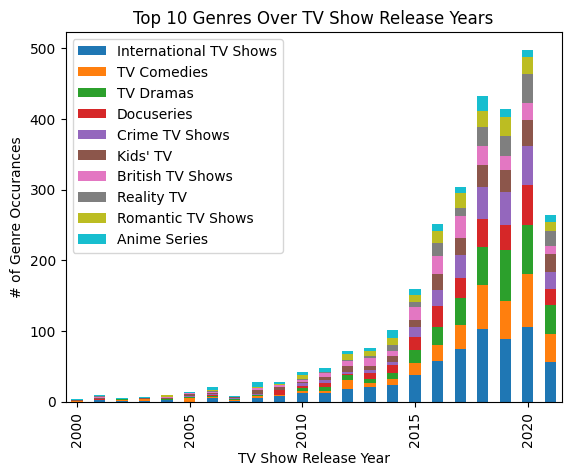

In [15]:
# Define the top 10 categories
top_10_tvgenres = list(tv_list_df.sum().sort_values(ascending=False).head(10).index)

# Group by 'release_year' and sum the data
grouped_top10genre_tvshow_data = tv_shows_df[['release_year'] + top_10_tvgenres].groupby('release_year').sum()

grouped_top10genre_tvshow_data_filtered = grouped_top10genre_tvshow_data[grouped_top10genre_tvshow_data.index >= 2000]


# Create a larger figure before plotting
plt.figure(figsize=(24, 16))  # Set the width to 12 inches and height to 8 inches

bx = grouped_top10genre_tvshow_data_filtered.plot(kind='bar', stacked=True)

# Get the current x-axis labels and positions
tv_x_labels = bx.get_xticklabels()
tv_x_positions = bx.get_xticks()

# Set the x-axis ticks to show every ten years
new_tv_x_positions = tv_x_positions[::5]
new_tv_x_labels = [label.get_text() for label in tv_x_labels][::5]

# Set the new x-axis ticks and labels
bx.set_xticks(new_tv_x_positions)
bx.set_xticklabels(new_tv_x_labels)

# Add title and axis labels
plt.title('Top 10 Genres Over TV Show Release Years')  # Add a title
plt.xlabel('TV Show Release Year')  # Label for the x-axis
plt.ylabel('# of Genre Occurances')  # Label for the y-axis

# Display the plot
plt.show()

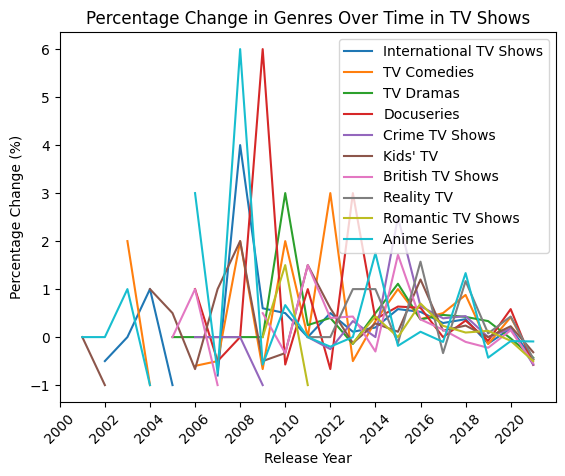

In [16]:
#How did genres change over time in TV Shows?
y_label_movie_ls = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
grouped_top10genre_tvshow_data_filtered.pct_change().plot()
plt.title('Percentage Change in Genres Over Time in TV Shows')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Release Year')
plt.xticks(y_label_movie_ls, rotation=45)
plt.show()

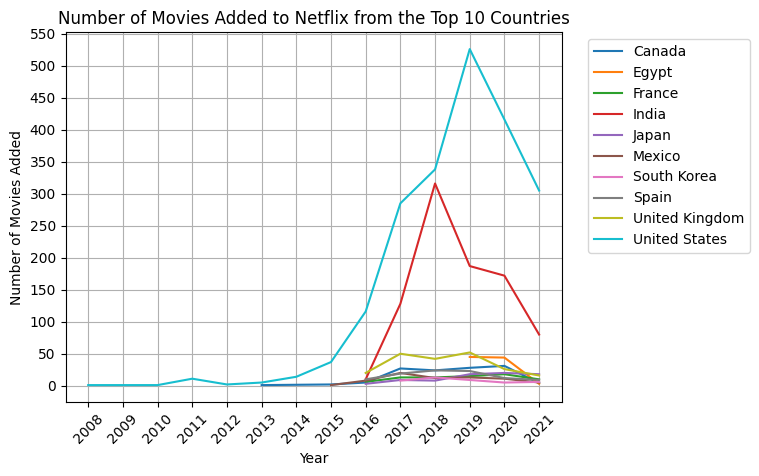

In [17]:
# Viewing years in all countries
Movie_years = movies_df.groupby('country')['year_added'].unique()

# Viewing number of movies in the countries
num_Movies = movies_df.groupby('country')['type'].count()

# Aggregate the data to get the total number of TV shows added per country over the years
Movie_data = movies_df.groupby(['country', 'year_added']).size().reset_index(name='num_movies')

# Second graph Top 10 Countries. How many Movies are added per year based on each country? Line graph
# Plot the total number of TV shows added per country over the years
for country, data in Movie_data.groupby('country'):
    plt.plot(data['year_added'], data['num_movies'], label=country)

plt.title('Number of Movies Added to Netflix from the Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Movies Added')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xticks(data['year_added'], rotation=45)
plt.yticks(np.arange(0, 600, 50))
plt.grid()
plt.show()

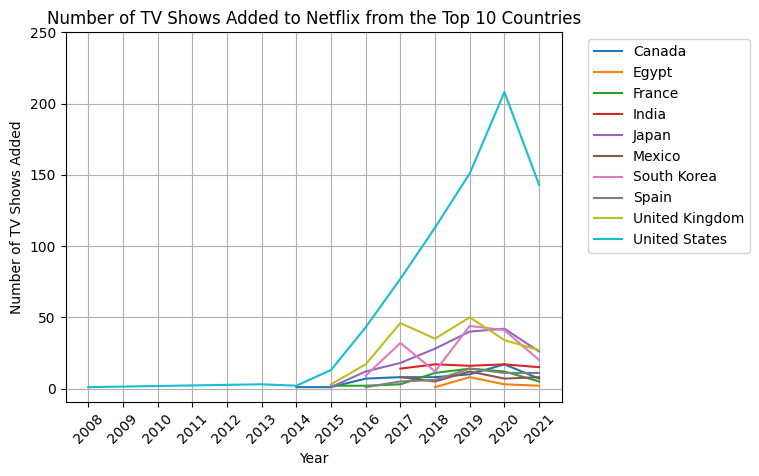

In [18]:
# Viewing years in all countries
TV_years = tv_shows_df.groupby('country')['year_added'].unique()

# Viewing number of TV shows in the countries
num_TV_shows = tv_shows_df.groupby('country')['type'].count()

# Aggregate the data to get the total number of TV shows added per country over the years
TV_data = tv_shows_df.groupby(['country', 'year_added']).size().reset_index(name='num_shows')

# First graph Top 10 Countries. How many TV shows are added per year based on each country? Line graph
# create list of y-labels due to missing values in year_added.
y_label_ls = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Plot the total number of TV shows added per country over the years
for country, data in TV_data.groupby('country'):
    plt.plot(data['year_added'], data['num_shows'], label=country)

plt.title('Number of TV Shows Added to Netflix from the Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows Added')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xticks(y_label_ls, rotation=45)
plt.yticks(np.arange(0, 300, 50))
plt.grid()
plt.show()

In [19]:
#Ratings Data
rating_view = top_10_data.groupby('rating').size().sort_values(ascending=False)
rating_view

rating
TV-MA       1891
TV-14       1347
TV-PG        555
R            498
PG-13        310
PG           182
TV-Y7        159
TV-Y         146
TV-G         136
NR            54
G             30
TV-Y7-FV       3
UR             2
NC-17          2
74 min         1
84 min         1
66 min         1
dtype: int64

In [20]:
#Percentage Ratings for Movies.
movies_ratings = top_10_data[top_10_data['type'] == 'Movie'][['title', 'rating', 'country']]
movie_rating_count = movies_ratings['rating'].count()
movie_rating_perc = round((movies_ratings.groupby(['rating','country']).size().sort_values(ascending=False) / movie_rating_count) * 100, 2)
movie_rating_perc

rating  country      
TV-MA   United States    16.43
TV-14   India            14.10
R       United States    11.80
PG-13   United States     7.75
TV-MA   India             5.76
                         ...  
NC-17   United States     0.03
        Canada            0.03
G       Canada            0.03
84 min  United States     0.03
UR      United States     0.03
Length: 87, dtype: float64

In [21]:
# Create a DataFrame to display the information
movie_rating_table = movie_rating_perc.unstack().fillna(0)
print(movie_rating_table)

country   Canada  Egypt  France  India  Japan  Mexico  South Korea  Spain  \
rating                                                                      
66 min      0.00   0.00    0.00   0.00   0.00    0.00         0.00   0.00   
74 min      0.00   0.00    0.00   0.00   0.00    0.00         0.00   0.00   
84 min      0.00   0.00    0.00   0.00   0.00    0.00         0.00   0.00   
G           0.03   0.00    0.00   0.00   0.00    0.00         0.00   0.00   
NC-17       0.03   0.00    0.00   0.00   0.00    0.00         0.00   0.00   
NR          0.05   0.00    0.00   0.11   0.00    0.11         0.08   0.00   
PG          0.21   0.00    0.03   0.05   0.11    0.00         0.00   0.03   
PG-13       0.08   0.00    0.03   0.11   0.08    0.03         0.00   0.03   
R           0.43   0.00    0.05   0.03   0.00    0.11         0.00   0.05   
TV-14       0.35   1.64    0.54  14.10   0.54    0.21         0.08   0.24   
TV-G        0.16   0.03    0.00   0.16   0.00    0.03         0.00   0.00   

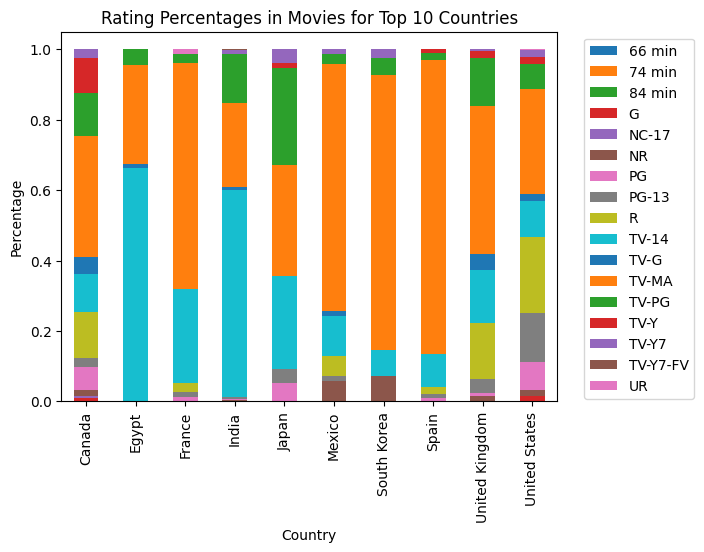

In [22]:
# New plot for Rating Percentages in Movies for Top 10 Countries
movies_ratings_pivot=movies_ratings.pivot_table(index='rating', columns='country', aggfunc='size')
(movies_ratings_pivot/(movies_ratings_pivot.sum())).T.plot(kind='bar', stacked=True)
plt.title('Rating Percentages in Movies for Top 10 Countries')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.show()

In [23]:
#Percentage of Ratings in TV Shows
tv_ratings = top_10_data[top_10_data['type'] == 'TV Show'][['title', 'rating']]
tv_ratings = tv_ratings.merge(top_10_data[['title', 'country']], on='title', how='left')
tv_rating_count = tv_ratings['rating'].count()
tv_rating_perc = round((tv_ratings.groupby(['rating','country']).size().sort_values(ascending=False) / tv_rating_count) * 100, 2)
tv_rating_perc.head(5)

rating  country       
TV-MA   United States     19.84
TV-14   United States     12.15
TV-PG   United States      6.61
TV-MA   United Kingdom     5.67
TV-14   South Korea        5.04
dtype: float64

In [24]:
# Create a DataFrame to display the information
tv_rating_table = tv_rating_perc.unstack().fillna(0)
print(tv_rating_table)

country   Canada  Egypt  France  India  Japan  Mexico  South Korea  Spain  \
rating                                                                      
NR          0.00   0.00    0.00   0.00   0.00    0.00         0.00   0.06   
TV-14       0.82   0.69    0.06   1.51   4.47    0.31         5.04   0.25   
TV-G        0.50   0.00    0.13   0.19   0.06    0.06         0.06   0.06   
TV-MA       1.20   0.19    2.02   2.08   3.97    1.76         3.34   2.39   
TV-PG       0.44   0.00    0.06   0.63   1.13    0.25         0.88   0.19   
TV-Y        0.31   0.00    0.63   0.31   0.06    0.00         0.25   0.06   
TV-Y7       0.38   0.00    0.19   0.25   0.88    0.13         0.38   0.00   
TV-Y7-FV    0.06   0.00    0.00   0.00   0.00    0.00         0.00   0.00   

country   United Kingdom  United States  
rating                                   
NR                  0.13           0.13  
TV-14               2.58          12.15  
TV-G                0.88           2.52  
TV-MA              

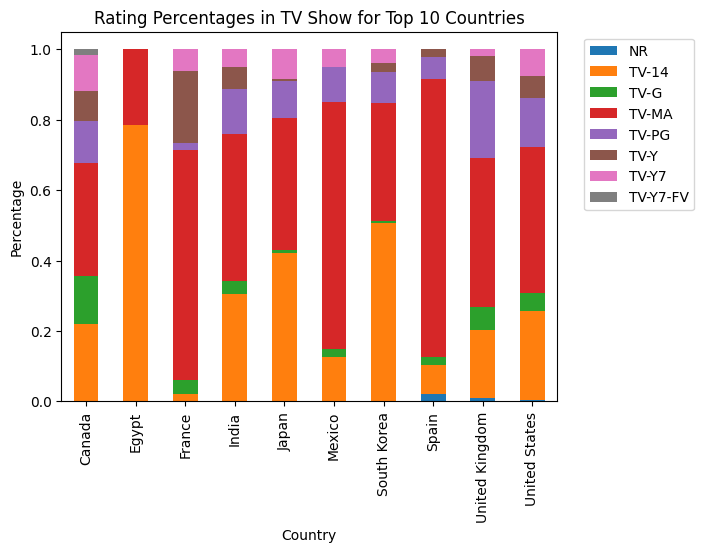

In [25]:
# New plot for Rating Percentages in Movies for Top 10 Countries
tv_ratings_pivot=tv_ratings.pivot_table(index='rating', columns='country', aggfunc='size')
(tv_ratings_pivot/(tv_ratings_pivot.sum())).T.plot(kind='bar', stacked=True)
plt.title('Rating Percentages in TV Show for Top 10 Countries')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.show()

In [26]:
# Average number of tv show seasons
grouped_data = top_10_data.groupby('title').agg({'duration': lambda x: int(x.split()[0]) if 'Season' in x else 1})
average_seasons = grouped_data['duration'].mean()
print("Average number of seasons per TV show:", average_seasons)

Average number of seasons per TV show: 1.0


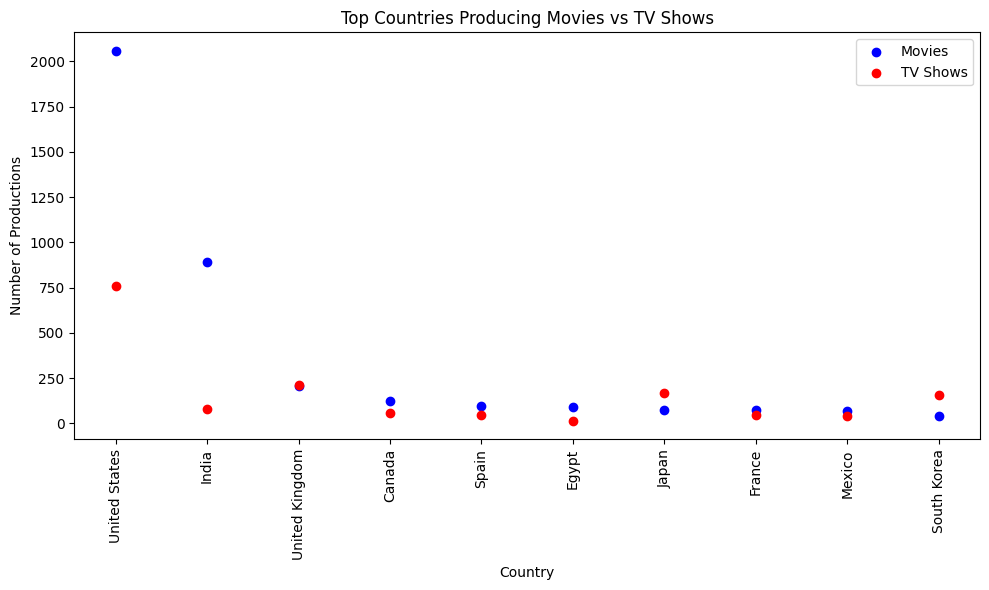

In [27]:
## Scatter plot of comparison between film and tv show
movies_data = top_10_data[top_10_data['type'] == 'Movie']
movies_countries = movies_data['country'].dropna()
movies_country_counts = movies_countries.value_counts().head(10)

tv_shows_data = top_10_data[top_10_data['type'] == 'TV Show']
tv_shows_countries = tv_shows_data['country'].dropna()
tv_shows_country_counts = tv_shows_countries.value_counts().head(10)

movies_x = movies_country_counts.index
movies_y = movies_country_counts.values

tv_shows_x = tv_shows_country_counts.index
tv_shows_y = tv_shows_country_counts.values

plt.figure(figsize=(10, 6))
plt.scatter(movies_x, movies_y, color='blue', label='Movies')
plt.scatter(tv_shows_x, tv_shows_y, color='red', label='TV Shows')

plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.title('Top Countries Producing Movies vs TV Shows')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

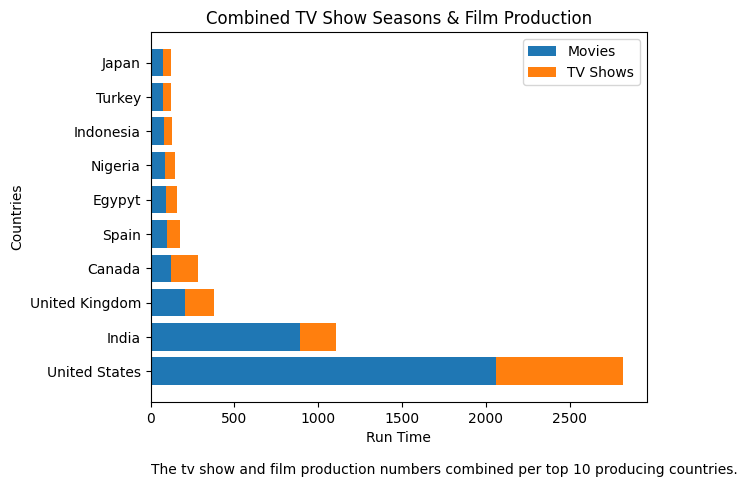

In [28]:
## Combined TV Show Seasons & Film Production
## Horizontal bar chart
categories = ['United States', 'India', 'United Kingdom', 'Canada', 'Spain', 'Egypyt',
              'Nigeria', 'Indonesia', 'Turkey', 'Japan']
values1_movie = [2058, 893, 206 ,122 ,97 ,92 ,86, 77, 76, 76]
values2_tvshow = [760, 213, 169, 158, 79, 68, 59, 49, 48, 48]
fig, ax = plt.subplots()
ax.barh(categories, values1_movie, label='Movies')
ax.barh(categories, values2_tvshow, left=values1_movie, label='TV Shows')

ax.set_ylabel('Countries')
ax.set_xlabel('Run Time')
ax.set_title('Combined TV Show Seasons & Film Production')
ax.legend()

## Analysis label
plt.text(5, -3.0, "The tv show and film production numbers combined per top 10 producing countries.", ha='left')

plt.show()

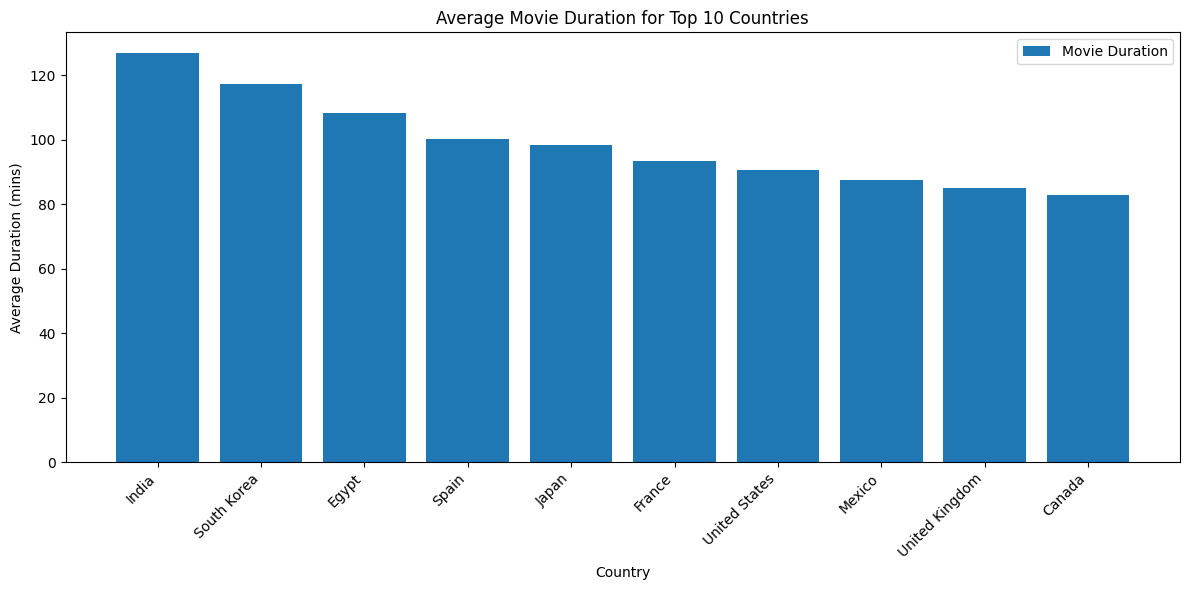

In [29]:
# Average Number of movie duration for Top 10 Countries
# Country names overlap at the bottom with this code, error fixed!

exact_data = top_10_data[['country', 'type', 'duration']]
exact_data = exact_data.dropna(subset=['country'])
exact_data = exact_data.dropna(subset=['duration'])

exact_data['duration'] = exact_data['duration'].apply(lambda x: int(x.split()[0]))

grouped_data = exact_data.groupby(['country', 'type']).mean().reset_index()

# movies separated
movies_data = grouped_data[grouped_data['type'] == 'Movie'].nlargest(10, 'duration')

#plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(movies_data['country'], movies_data['duration'], label='Movie Duration')

# labels
ax.set_xlabel('Country')
ax.set_ylabel('Average Duration (mins)')
ax.set_title('Average Movie Duration for Top 10 Countries')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

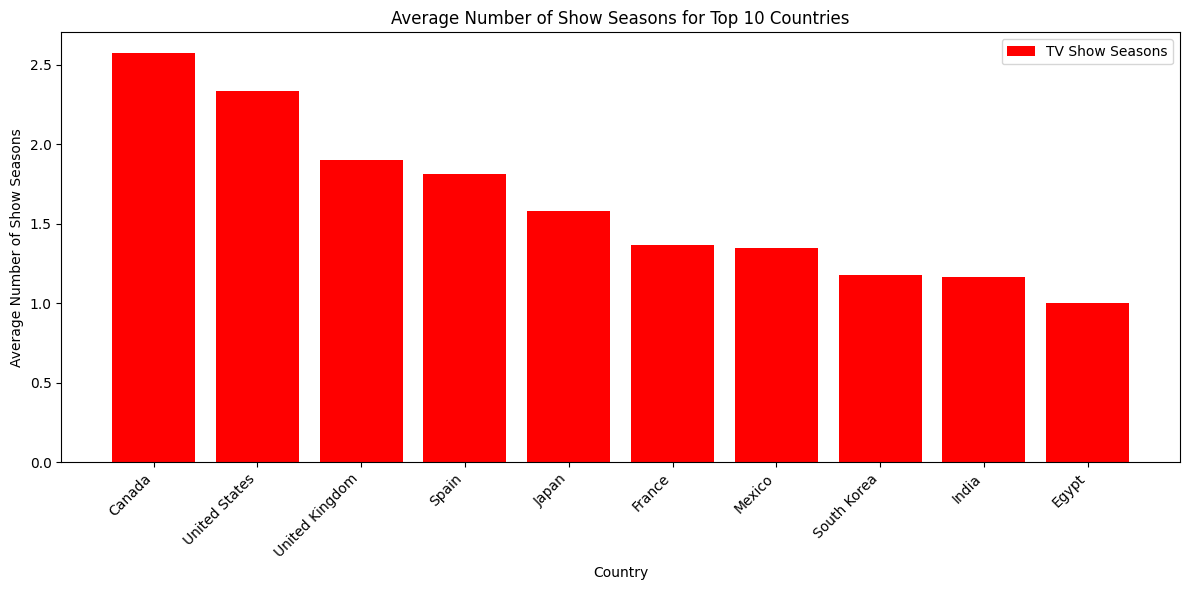

In [30]:
#Plotting Average Number of Show Seasons for Top 10 Countries (Across Movies & TV Shows)
tv_shows_data = grouped_data[grouped_data['type'] == 'TV Show'].nlargest(10, 'duration')

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(tv_shows_data['country'], tv_shows_data['duration'], color='red', label='TV Show Seasons')

# labels
ax.set_xlabel('Country')
ax.set_ylabel('Average Number of Show Seasons')
ax.set_title('Average Number of Show Seasons for Top 10 Countries')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()